# Support Vector Machine example

This is from (the schikit-learn webpage)[http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html].


An example showing how the scikit-learn can be used to recognize images of hand-written digits.


## imports

In [11]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# printing options 
np.set_printoptions(linewidth=250)
np.set_printoptions(precision=3)

# plotting options
%matplotlib inline
plt.rc('font'  , size=18)
plt.rc('figure', figsize=(10, 8))
plt.rc('axes'  , labelsize=22)
plt.rc('legend', fontsize=16)
plt.rc('figure', figsize=(10, 8))

## Load Data

Scikit-learn has built in datasets for examples.

In [4]:
# The digits dataset
digits = datasets.load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [5]:
print(digits.DESCR)

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

## Visualize data

The data that we are interested in is made of 8x8 images of digits, let's have a look at the first 3 images, stored in the `images` attribute of the dataset.  If we were working from image files, we could load them using pylab.imread.  Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.

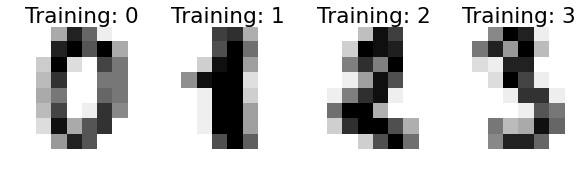

In [12]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

## Train the data

To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:

In [15]:
n_samples = len(digits.images)
n_samples

1797

In [16]:
data = digits.images.reshape((n_samples, -1))
data.shape

(1797L, 64L)

Create a classifier: a support vector classifier

In [17]:
classifier = svm.SVC(gamma=0.001)
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

We learn the digits on the first half of the digits

In [18]:
X_train = data[:n_samples/2]
y_train = digits.target[:n_samples/2]
X_train.shape, y_train.shape

((898L, 64L), (898L,))

In [19]:
classifier.fit(X_train, y_train)
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

## How did we do?

Now predict the value of the digit on the second half:

In [20]:
X_test = data[n_samples/2:]
y_test = digits.target[n_samples/2:]
X_test.shape, y_test.shape

((899L, 64L), (899L,))

In [21]:
expected  = y_test
predicted = classifier.predict(X_test)

In [22]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79 

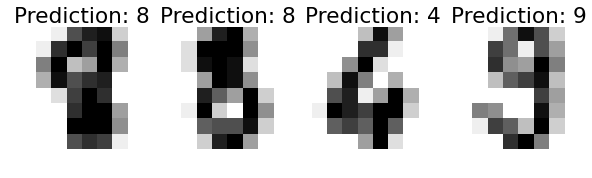

In [23]:
images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()